# Business Understanding

The company would like to create a new movie studio for original video content, but we don't have any experience with making movies.  Here, we want to explore what types of films are performing best at the box office currently in order to make recommendations about what type of films to create in our new studio.

# Data Understanding

We are working with two datasets provided by IMDB and The Numbers.  The data includes information about movies and their genres, ratings, directors and writers, domestic and internatinal gross revenue, and budget.

## Data Preparation

In [87]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('data/im.db')

In [88]:
IMDB = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
IMDB

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [89]:
pd.read_sql("SELECT * FROM movie_basics;", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [90]:
query = '''
SELECT
    mb.*,
    p.primary_name AS writer_name
FROM
    movie_basics AS mb
JOIN
    writers AS w ON mb.movie_id = w.movie_id
JOIN
    persons AS p ON w.person_id = p.person_id;
'''

IMDB_df = pd.read_sql(query, conn)
IMDB_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,writer_name
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Abrar Alvi
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Gulzar
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Mahasweta Devi
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Anjana Rawail
4,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Orson Welles
...,...,...,...,...,...,...,...
255866,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,Kiran Gawade
255867,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Vinicius Augusto Bozzo
255868,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Vinicius Augusto Bozzo
255869,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,Angela Gurgel


In [91]:
conn.close()

In [92]:
TN = pd.read_csv('data/tn.movie_budgets.csv.gz')

In [93]:
TN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [9]:
TN.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Changing monetary column values from string to integer in order to perform mathematical operations...

In [94]:
columns_without_symbols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in columns_without_symbols:
    TN[col] = TN[col].str.replace('$', '', regex=False)
    TN[col] = TN[col].str.replace(',', '', regex=False)

In [11]:
TN.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


Here I'm going to calculate profit and ROI from the values provided above, so that I can use ROI as a measure of movie success moving forward.

In [95]:
converted_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in converted_columns:
    TN[col] = pd.to_numeric(TN[col], errors='coerce')

In [96]:
TN['profit'] = (TN['domestic_gross'] + TN['worldwide_gross']) - TN['production_budget']
TN.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


Note that we report ROI as a percentage, so we multiply by 100.

In [97]:
TN['ROI'] = (TN['profit'] / TN['production_budget']) * 100
TN.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904,732.200683
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300,-44.992943
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,463.224389
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129,511.010451


In [98]:
TN['release_date'] = pd.to_datetime(TN['release_date'])

In [99]:
TN['release_month'] = TN['release_date'].dt.strftime('%b')

In [17]:
TN

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-157475300,-44.992943,Jun
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,463.224389,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129,511.010451,Dec
...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec
5778,79,1999-04-02,Following,6000,48482,240495,282977,4716.283333,Apr
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-2324,-46.480000,Jul
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep


# Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

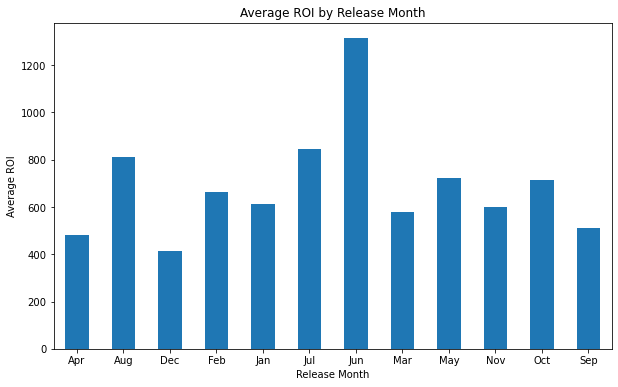

In [100]:
import matplotlib.pyplot as plt
ROI_by_month = TN.groupby('release_month')['ROI'].mean()

ROI_by_month.plot(kind='bar', figsize=(10,6))

plt.title('Average ROI by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average ROI')
plt.xticks(rotation=0)
plt.show

In [102]:
df = pd.merge(TN,
             IMDB_df[['primary_title', 'genres', 'writer_name']],
left_on='movie',
right_on='primary_title',
how='inner')
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month,primary_title,genres,writer_name
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Avatar,Horror,Yûsuke Yamada
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Avatar,Horror,Teruo Noguchi
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",Stuart Beattie
3,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",Ted Elliott
4,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",Tim Powers
...,...,...,...,...,...,...,...,...,...,...,...,...
8522,73,2012-01-13,Newlyweds,9000,4584,4584,168,1.866667,Jan,Newlyweds,"Comedy,Drama",Edward Burns
8523,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec,Red 11,"Horror,Sci-Fi,Thriller",Robert Rodriguez
8524,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec,Red 11,"Horror,Sci-Fi,Thriller",Racer Rodriguez
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,A Plague So Pleasant,"Drama,Horror,Thriller",Benjamin Roberds


In [103]:
df = df.drop('primary_title', axis=1)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month,genres,writer_name
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Yûsuke Yamada
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Teruo Noguchi
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,"Action,Adventure,Fantasy",Stuart Beattie
3,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,"Action,Adventure,Fantasy",Ted Elliott
4,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,"Action,Adventure,Fantasy",Tim Powers
...,...,...,...,...,...,...,...,...,...,...,...
8522,73,2012-01-13,Newlyweds,9000,4584,4584,168,1.866667,Jan,"Comedy,Drama",Edward Burns
8523,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec,"Horror,Sci-Fi,Thriller",Robert Rodriguez
8524,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec,"Horror,Sci-Fi,Thriller",Racer Rodriguez
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,"Drama,Horror,Thriller",Benjamin Roberds


In [104]:
df_exploded = df.assign(genres=df['genres'].str.split(',')).explode('genres')
ROI_by_genre = df_exploded.groupby('genres')['ROI'].mean().sort_values(ascending=False)
df_exploded

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month,genres,writer_name
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Yûsuke Yamada
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Teruo Noguchi
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Action,Stuart Beattie
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Adventure,Stuart Beattie
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Fantasy,Stuart Beattie
...,...,...,...,...,...,...,...,...,...,...,...
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Thriller,Benjamin Roberds
8526,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Drama,Benjamin Roberds
8526,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds


In [105]:
cutoff_date = pd.to_datetime('1995-01-01')
df_modern = df_exploded[df_exploded['release_date'] >= cutoff_date]
df_modern

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month,genres,writer_name
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Yûsuke Yamada
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Teruo Noguchi
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Action,Stuart Beattie
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Adventure,Stuart Beattie
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,213.377435,May,Fantasy,Stuart Beattie
...,...,...,...,...,...,...,...,...,...,...,...
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Thriller,Benjamin Roberds
8526,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Drama,Benjamin Roberds
8526,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds


<function matplotlib.pyplot.show(close=None, block=None)>

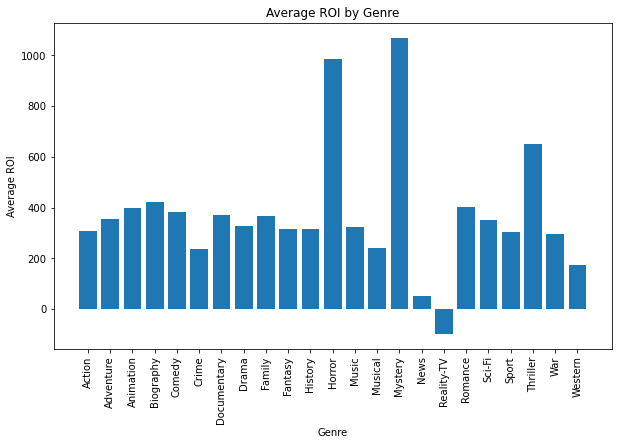

In [106]:
ROI_by_genre = df_modern.groupby('genres')['ROI'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(ROI_by_genre['genres'], ROI_by_genre['ROI'])
plt.title('Average ROI by Genre')
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.xticks(rotation=90)
plt.show

In [108]:
best_genres = ['Horror', 'Mystery', 'Thriller']
df_filtered = df_modern[df_modern['genres'].isin(best_genres)]
df_filtered

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month,genres,writer_name
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Yûsuke Yamada
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,732.200683,Dec,Horror,Teruo Noguchi
52,10,2015-11-06,Spectre,300000000,200074175,879620923,779695098,259.898366,Nov,Thriller,Ian Fleming
53,10,2015-11-06,Spectre,300000000,200074175,879620923,779695098,259.898366,Nov,Thriller,Jez Butterworth
54,10,2015-11-06,Spectre,300000000,200074175,879620923,779695098,259.898366,Nov,Thriller,John Logan
...,...,...,...,...,...,...,...,...,...,...,...
8524,78,2018-12-31,Red 11,7000,0,0,-7000,-100.000000,Dec,Thriller,Racer Rodriguez
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds
8525,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Thriller,Benjamin Roberds
8526,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.000000,Sep,Horror,Benjamin Roberds


In [109]:
ROI_by_budget = df_filtered = df[['ROI', 'production_budget']]
ROI_by_budget

,ROI,production_budget
0,732.200683,425000000
1,732.200683,425000000
2,213.377435,410600000
3,213.377435,410600000
4,213.377435,410600000
...,...,...
8522,1.866667,9000
8523,-100.000000,7000
8524,-100.000000,7000
8525,-100.000000,1400


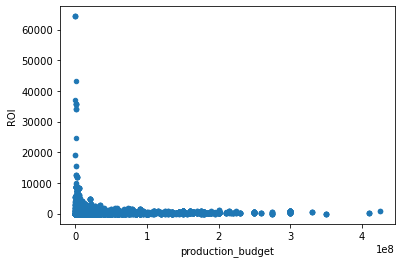

In [111]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

ROI_by_budget.plot.scatter(x="production_budget", y='ROI');

# Conclusions

## Limitations

## Recommendations

## Next Steps